In [2]:
#Explorando datos inmobiliarios
#Fuente: www.properati.com.ar

In [2]:
#Instalación de paquetes
list.of.packages <- c('data.table', 'leaflet', 'ggplot2', 'ggthemes',
                      'ggmap', 'VIM', 'rMaps')

new.packages <- list.of.packages[!(list.of.packages %in% 
                                   installed.packages()[,"Package"])]

if(length(new.packages)) install.packages(new.packages, 
                                          repos = "https://cran.r-project.org")

suppressMessages(require(devtools))
suppressMessages(install_github('ramnathv/rCharts@dev'))
suppressMessages(install_github('ramnathv/rMaps'))    
    
library(data.table)
library(ggplot2)
library(ggthemes)
library(ggmap)
library(leaflet)
library(VIM)
library(rMaps)  
    
#Configuraciones adicionales
options(warn=-1, scipen = 999, repr.plot.width=7, repr.plot.height=5)

Loading required package: colorspace
Loading required package: grid
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



In [3]:
#Carga de datos
df <- fread(input = 'data/properati-AR-2016-12-01-properties-rent.csv', 
                          encoding = 'UTF-8')
df <- as.data.frame(df)

In [4]:
#Exploracion inicial

head(df) #Primeras 5 observaciones del dataset
str(df)  #Tipos de datos de cada atributo

created_on operation property_type place_name
1 2013-05-24 rent      apartment     Quilmes   
2 2013-05-24 rent      PH            Tigre     
3 2013-05-24 rent      apartment     Quilmes   
4 2013-05-24 rent      house         Tigre     
5 2013-05-24 rent      apartment     Tigre     
6 2013-05-24 rent      apartment     La Matanza
  place_with_parent_names                         geonames_id
1 |Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|      3429651    
2 |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|      3427753    
3 |Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|      3429651    
4 |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|      3427753    
5 |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|      3427753    
6 |Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza| 3430786    
  lat-lon                      lat           lon            price ...
1 -34.698860457,-58.2932424545 -34.698860457 -58.2932424545 1200  ...
2 -34.482023,-58.6484254       -34.482023    -58.6484254    1600  ...
3 -34.7276479,-58.2513328      -34.7276479   -58.2513328    1800  ...
4 -34.4142917,-58.6915491      -34.4142917   -58.6915491    2100  ...
5 -34.4257507,-58.5862979      -34.4257507   -58.5862979    1600  ...
6 -34.6872405,-58.5063517      -34.6872405   -58.5063517    1800  ...
  surface_covered_in_m2 price_usd_per_m2 price_per_m2 floor rooms expenses
1 18                    4.248889         66.666667    NA    1     NA      
2 32                    3.186562         50.000000    NA    3     NA      
3 80                    0.956000         22.500000    NA    3     NA      
4 80                    1.673000         26.250000    NA    3     NA      
5 50                    2.039400         32.000000    NA    2     NA      
6 NA                          NA                      NA    2     NA      
  properati_url                                                                          
1 http://quilmes-bs-as-g-b-a-zona-sur.properati.com.ar/7fg1_alquiler_departamento_quilmes
2 http://tigre-bs-as-g-b-a-zona-norte.properati.com.ar/7fga_alquiler_ph_tigre            
3 http://quilmes-bs-as-g-b-a-zona-sur.properati.com.ar/7fgj_alquiler_departamento_quilmes
4 http://tigre-bs-as-g-b-a-zona-norte.properati.com.ar/7fkz_alquiler_casa_tigre          
5 http://tigre-bs-as-g-b-a-zona-norte.properati.com.ar/7fl0_alquiler_departamento_tigre  
6 http://la-matanza.properati.com.ar/7fn1_alquiler_departamento_la-matanza               
  description                                                                                                                                    
1 .Publicado por EDUARDO RODRIGUEZ PROPIEDADES a traves INMOMAP                                                                                  
2 .Publicado por Herrera &amp; Cia a traves INMOMAP                                                                                              
3 .Publicado por Servicios Profesionales Alvarez Casal a traves INMOMAP                                                                          
4 CASA CENTRO DE BENAVIDEZ CON GAS NATURAL SIN COCHERA CON PIELTA .Publicado por piperse a traves INMOMAP                                        
5 DEPARTAMENTO CENTRICO NO SE ADMITEN MASCOSTAS SIN COCHERA, SIN GAS NATURAL .Publicado por piperse a traves INMOMAP                             
6 Departamento a Estrenar de 2 ambientes 1 Dormitorio, Cocina, Comedor, Bao. Cualquier duda consultenos! al  .Publicado por Masu a traves INMOMAP
  title                          
1 Imperdible                     
2 ph 3 amb talar a 2 de colectora
3 Precio Increible!!!!!          
4 ALQUILER                       
5 ALQUILO                        
6 DPTO 2 AMBIENTES A ESTRENAR!   
  image_thumbnail                                                                                                                                                                                                                                                          
1 https://thumbs-cf.properati.com/4/j2I9dooc7iBCqzeOkIfqVut

'data.frame':	42091 obs. of  24 variables:
 $ created_on                : chr  "2013-05-24" "2013-05-24" "2013-05-24" "2013-05-24" ...
 $ operation                 : chr  "rent" "rent" "rent" "rent" ...
 $ property_type             : chr  "apartment" "PH" "apartment" "house" ...
 $ place_name                : chr  "Quilmes" "Tigre" "Quilmes" "Tigre" ...
 $ place_with_parent_names   : chr  "|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|" "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|" "|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|" "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|" ...
 $ geonames_id               : int  3429651 3427753 3429651 3427753 3427753 3430786 3430786 3430786 3430863 3430786 ...
 $ lat-lon                   : chr  "-34.698860457,-58.2932424545" "-34.482023,-58.6484254" "-34.7276479,-58.2513328" "-34.4142917,-58.6915491" ...
 $ lat                       : chr  "-34.698860457" "-34.482023" "-34.7276479" "-34.4142917" ...
 $ lon                       : chr  "-58.2932424545" "-58.6

In [5]:
#Eliminamos el tipo de operación porque es constante: son todos de tipo 'rent'
#No utilizaremos la url de la publicación ni la imagen.
#El atributo lat-lon lo descartamos porque ya poseemos ambos valores por separado.
cols <- c('operation', 'lat-lon', 'image_thumbnail') 
df[, cols] <- NULL

In [6]:
#Formateamos la fecha de creación de la publicación y agregamos atributos de mes, año y año-mes que 
#posteriormente nos facilitará algunas tareas.

meses_esp <- c("ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic")
df$created_on <- as.Date(df$created_on)
df$created_month <- factor(month(df$created_on), levels = 1:12, labels = meses_esp)
df$created_year <- as.factor(year(df$created_on))
df$created_yearmonth <- as.factor(paste(df$created_month, df$created_year, sep = '-'))

In [7]:
#Convertimos las variables property_type y currency de tipo character a factor
cols <- c('property_type', 'currency')
df[, cols] <- lapply(df[, cols], as.factor)

In [8]:
#Convertimos las siguientes variables que se encuentran en formato character a tipo númerico.
cols <- c('lat', 'lon', 'price_aprox_local_currency', 'price_aprox_usd', 'price_per_m2')
df[, cols] <- lapply(df[, cols], as.numeric)

In [9]:
#Hay avisos de varios países pero solo nos interesa los de Argentina.

arg_index <- grepl('Argentina', df$place_with_parent_names)
table(ifelse(arg_index, "Argentina", "Extranjero"))  #Poco más de la mitad son avisos argentinos

round(prop.table(table(ifelse(arg_index, "Argentina", "Extranjero"))) * 100, 2)  #En porcentajes


 Argentina Extranjero 
     22297      19794 


 Argentina Extranjero 
     52.97      47.03 

In [10]:
#Eliminamos los avisos extranjeros y vemos nuevamente como quedó la estructura de nuestro dataset
df <- df[arg_index,]
rownames(df) <- 1:nrow(df)
df$place_with_parent_names <- gsub('\\|Argentina\\|', "", df$place_with_parent_names)
str(df)

'data.frame':	22297 obs. of  24 variables:
 $ created_on                : Date, format: "2013-05-24" "2013-05-24" ...
 $ property_type             : Factor w/ 4 levels "apartment","house",..: 1 3 1 2 1 1 2 1 1 2 ...
 $ place_name                : chr  "Quilmes" "Tigre" "Quilmes" "Tigre" ...
 $ place_with_parent_names   : chr  "Bs.As. G.B.A. Zona Sur|Quilmes|" "Bs.As. G.B.A. Zona Norte|Tigre|" "Bs.As. G.B.A. Zona Sur|Quilmes|" "Bs.As. G.B.A. Zona Norte|Tigre|" ...
 $ geonames_id               : int  3429651 3427753 3429651 3427753 3427753 3430786 3430786 3430786 3430863 3430786 ...
 $ lat                       : num  -34.7 -34.5 -34.7 -34.4 -34.4 ...
 $ lon                       : num  -58.3 -58.6 -58.3 -58.7 -58.6 ...
 $ price                     : num  1200 1600 1800 2100 1600 1800 1800 1600 5000 2200 ...
 $ currency                  : Factor w/ 3 levels "","ARS","USD": 2 2 2 2 2 2 2 2 2 2 ...
 $ price_aprox_local_currency: num  1213 1618 1820 2124 1618 ...
 $ price_aprox_usd         

In [11]:
#Tipo de propiedad

#Porcentaje de avisos segun tipo de propiedad
round(prop.table(table(df$property_type))*100, 2)


apartment     house        PH     store 
    56.56     23.19      2.51     17.74 

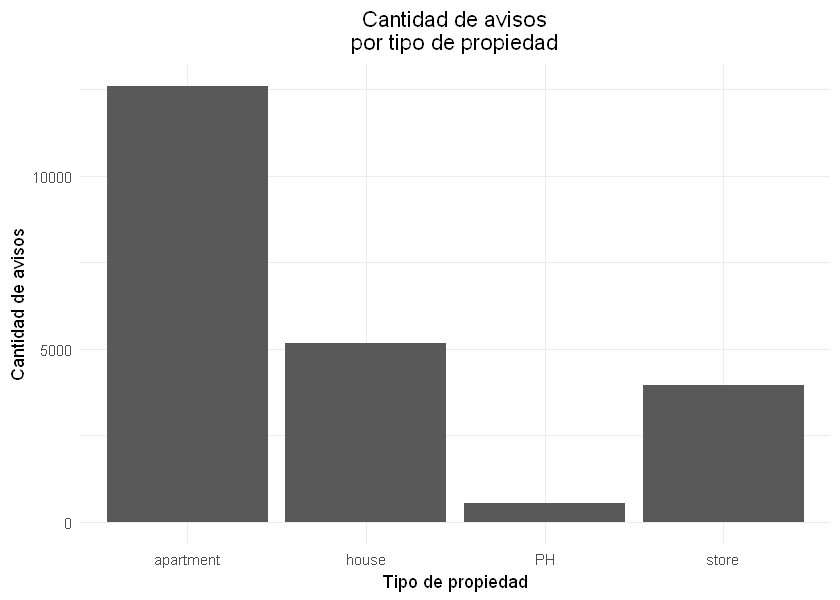

In [12]:
#Gráfico de cantidad de avisos según tipo de propiedad
ggplot(data = df, aes(x = property_type)) + geom_bar() +
  ggtitle('Cantidad de avisos\npor tipo de propiedad') +
  labs(x = 'Tipo de propiedad', y = 'Cantidad de avisos') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [13]:
#Lugares donde se conentran la mayorìa de los inmuebles (porcentajes)
round(head(sort(table(df$place_name), decreasing = TRUE), 10) / nrow(df) * 100, 2)


Mar del Plata       Pinamar     Roosevelt       Córdoba      Nordelta 
        10.29          5.53          5.42          3.73          2.85 
      Palermo   Manantiales      Belgrano       Rosario    San Rafael 
         2.73          2.30          2.24          2.19          1.77 

$apartment
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    817.9    5121.0    8702.0   25970.0   24570.0 1269000.0      1988 

$house
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    819.3   17410.0   43000.0   71090.0   87260.0 1349000.0       773 

$PH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  870.2  4550.0  6143.0  8881.0  9101.0 72100.0      59 

$store
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    819    5938   12290   29300   30340 1587000     603 


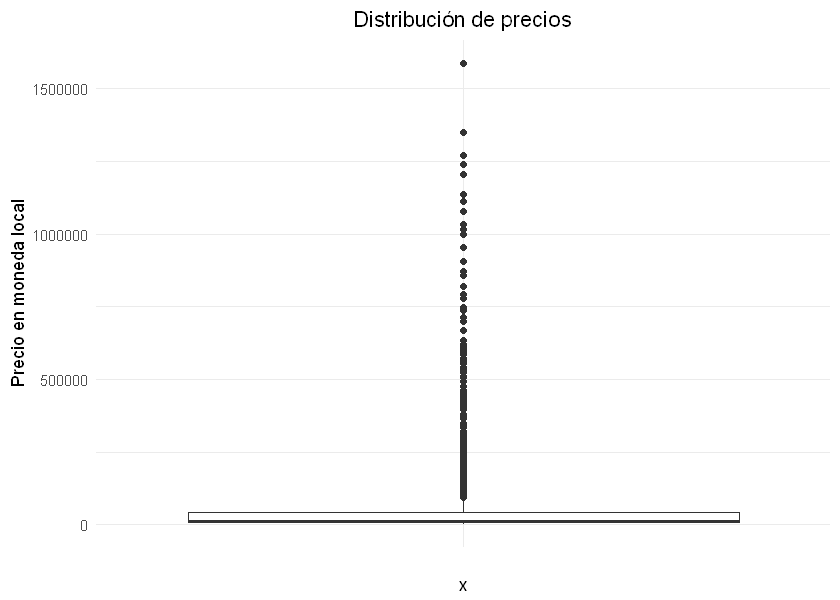

In [14]:
#Estadisticas de precios en moneda local según tipo de propiedad
tapply(df$price_aprox_local_currency, df$property_type, summary)


ggplot(data = df, aes(x = '', y = price_aprox_local_currency)) + geom_boxplot() +
    labs(y = 'Precio en moneda local') + ggtitle('Distribución de precios') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

In [15]:
#Cantidad de avisos por tipo de propiedad (top 10)
result <- tapply(df$place_name, df$property_type, table)
lapply(lapply(result, sort, decreasing = TRUE), head, 10)

$apartment

Mar del Plata     Roosevelt       Pinamar       Córdoba       Palermo 
         1723          1194           636           497           484 
     Belgrano      Nordelta       Rosario  Barrio Norte      Recoleta 
          399           351           335           326           308 

$house

                 Pinamar               San Rafael              Manantiales 
                     575                      373                      332 
           Mar del Plata                 Nordelta                  Montoya 
                     327                      275                      265 
Bs.As. G.B.A. Zona Norte                    Tigre                  Córdoba 
                     198                      163                      141 
               Benavidez 
                     136 

$PH

           Mar del Plata                Ituzaingó                  Quilmes 
                      58                       19                       19 
                 Córdoba     

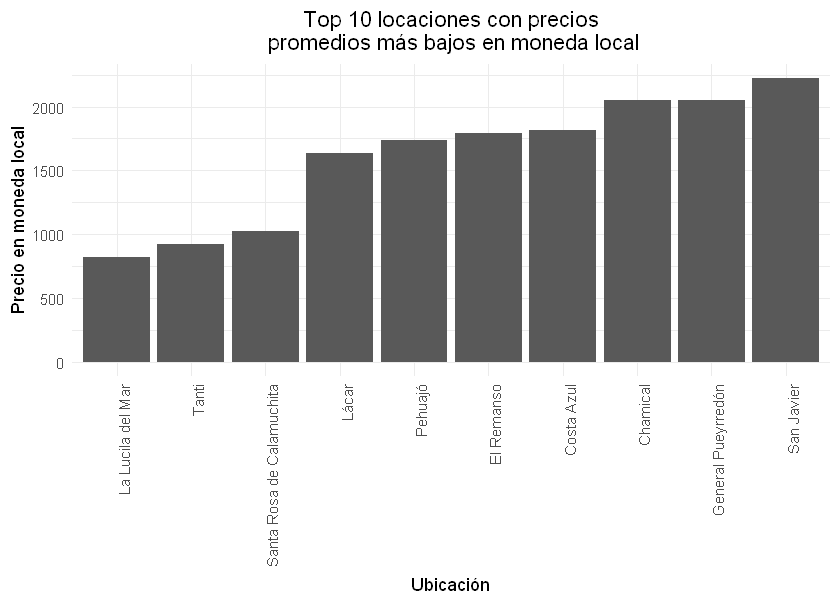

In [16]:
#Top 10 locaciones con precios promedios más bajos en moneda local
result <- aggregate(price_aprox_local_currency ~ place_name, data = df, mean)
result <- result[with(result, order(price_aprox_local_currency)), ]

top10 <- head(result,10)
top10$place_name <- factor(top10$place_name, levels = top10$place_name)

ggplot(data = top10, aes(x = factor(place_name), y = price_aprox_local_currency)) + 
  geom_bar(stat = 'identity') +
  labs(x = 'Ubicación', y = 'Precio en moneda local') +
  ggtitle('Top 10 locaciones con precios\n promedios más bajos en moneda local') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, hjust = 1))

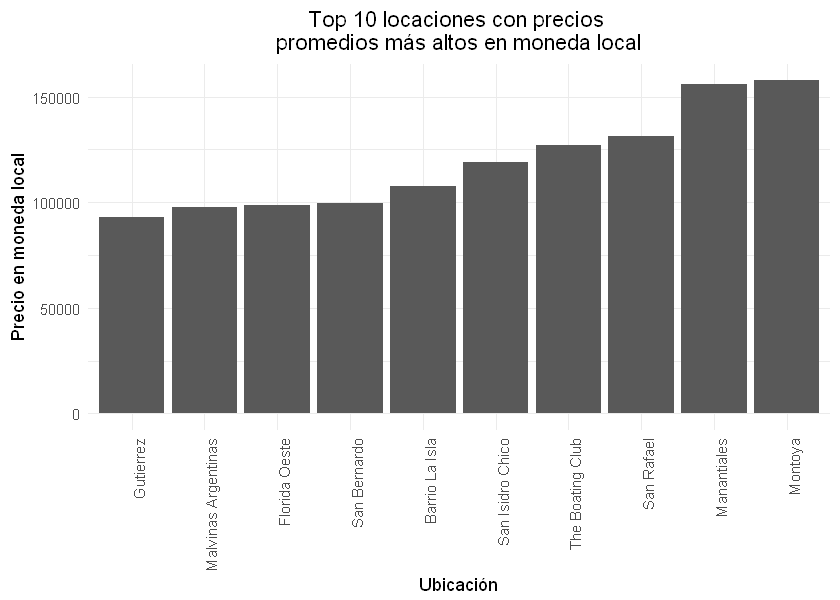

In [17]:
#Top 10 locaciones con precios promedios más altos en moneda local
top10 <- tail(result,10)
top10$place_name <- factor(top10$place_name, levels = top10$place_name)

ggplot(data = top10, aes(x = factor(place_name), y = price_aprox_local_currency)) + 
  geom_bar(stat = 'identity') +
  labs(x = 'Ubicación', y = 'Precio en moneda local') +
  ggtitle('Top 10 locaciones con precios \npromedios más altos en moneda local') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, hjust = 1))

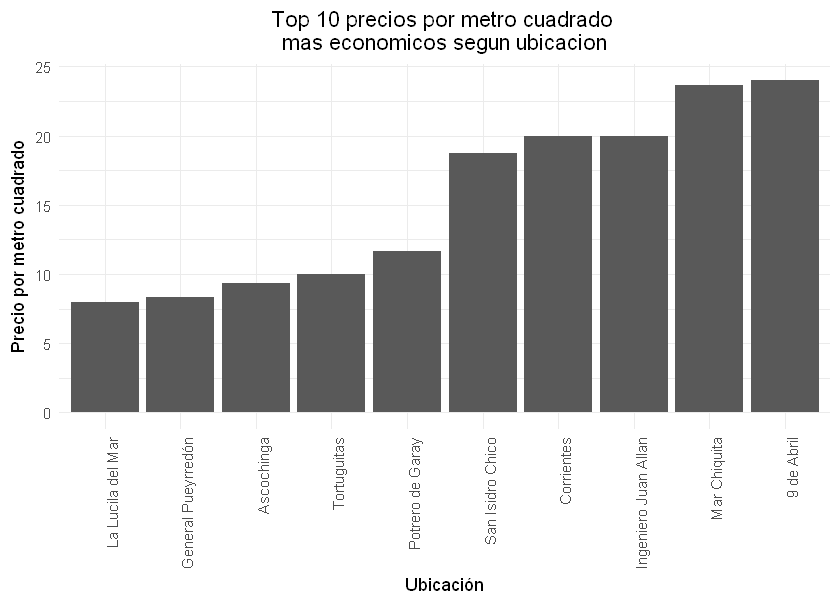

In [18]:
#Precio promedio por metro cuadrado por ubicación
result <- aggregate(price_per_m2 ~ place_name, data = df, median)
result <- result[with(result, order(price_per_m2)), ]

#Top 10 más barato
top10 <- head(result, 10)
top10$place_name <- factor(top10$place_name, levels = top10$place_name)

ggplot(data = top10, aes(x = factor(place_name), y = price_per_m2)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(x = 'Ubicación', y = 'Precio por metro cuadrado') +
  ggtitle('Top 10 precios por metro cuadrado \nmas economicos segun ubicacion') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, hjust = 1))

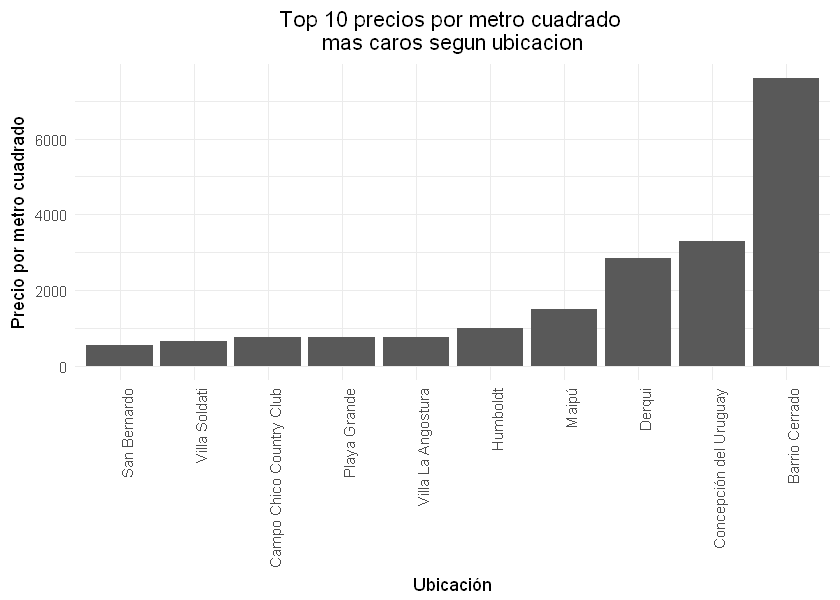

In [19]:
#Top 10 más caro
top10 <- tail(result, 10)
top10$place_name <- factor(top10$place_name, levels = top10$place_name)

ggplot(data = top10, aes(x = factor(place_name), y = price_per_m2)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  labs(x = 'Ubicación', y = 'Precio por metro cuadrado') + 
  ggtitle('Top 10 precios por metro cuadrado \nmas caros segun ubicacion') +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, hjust = 1))

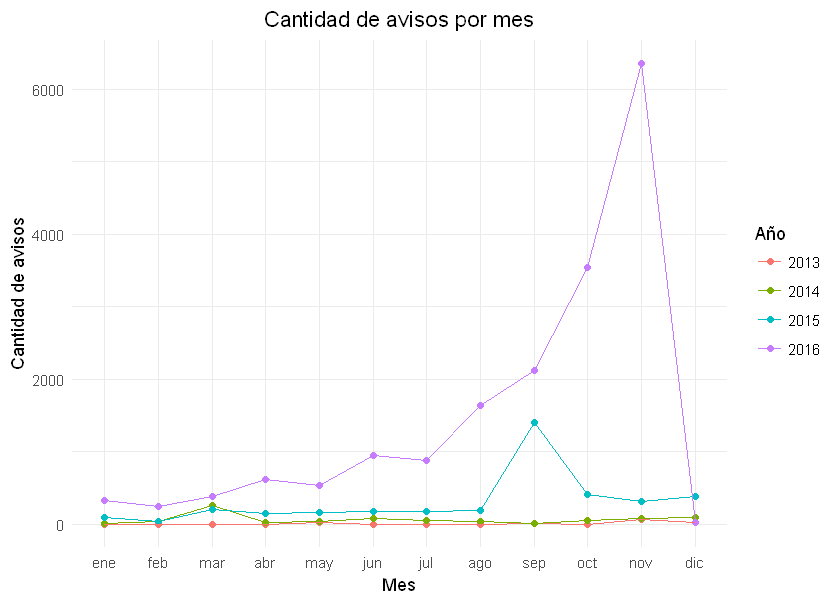

In [20]:
#Cantidad de publicaciones creadas
created_on_table <- table(df$created_month, df$created_year)
tmp <- as.data.frame(created_on_table)
names(tmp) <- c('mes', 'anio', 'freq')

ggplot(data = tmp, aes( x = mes, y = freq, group = anio, col = anio)) + geom_point() + 
    geom_line() + labs(x = 'Mes', y = 'Cantidad de avisos', color = "Año") +
    ggtitle('Cantidad de avisos por mes') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

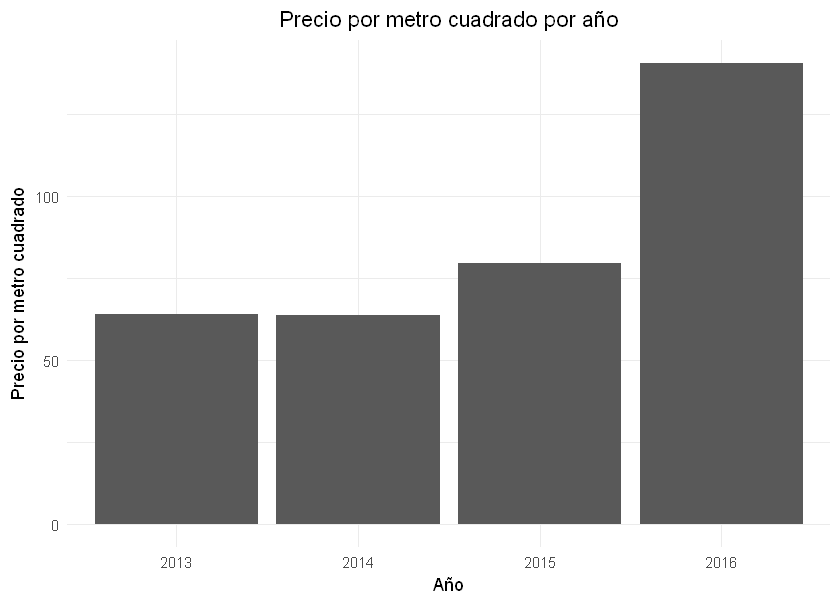

In [21]:
#Promedio del precio por metro cuadrado por año
result <- tapply(df$price_per_m2, df$created_year, median, na.rm = TRUE)
result <- data.frame(anio = names(result), price_per_m2 = result)
ggplot(data = result, aes(x = anio, y = price_per_m2)) + geom_bar(stat = 'identity') +
    labs(x = 'Año', y = "Precio por metro cuadrado") + 
    ggtitle("Precio por metro cuadrado por año") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

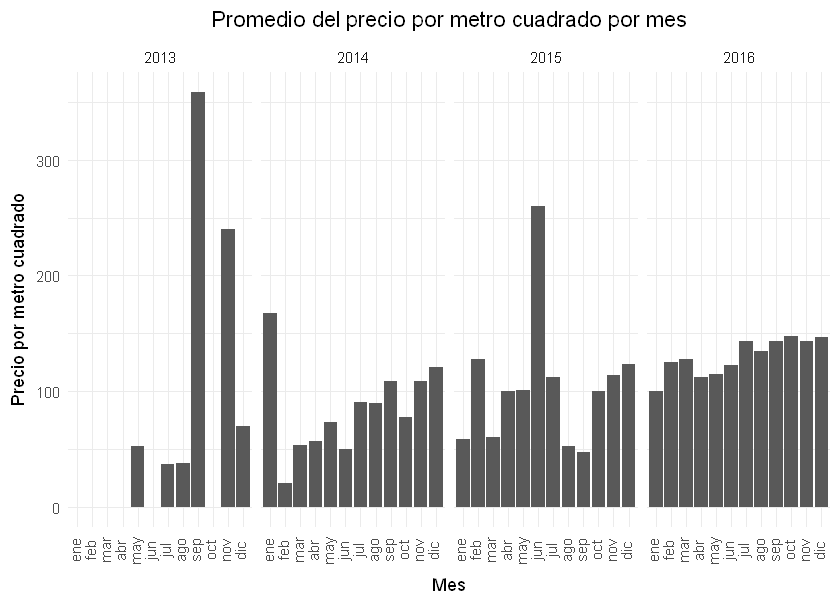

In [22]:
#Promedio del precio por metro cuadrado por mes
aux <- aggregate(price_per_m2 ~ created_month + created_year, data = df, median, na.rm = TRUE)

ggplot(data = aux, aes(x = created_month, y = price_per_m2)) + geom_bar(stat='identity') +
  facet_wrap(~created_year, nrow = 1) +
  labs(x = 'Mes', y = 'Precio por metro cuadrado') +
  ggtitle('Promedio del precio por metro cuadrado por mes') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.2), plot.title = element_text(hjust = 0.5))

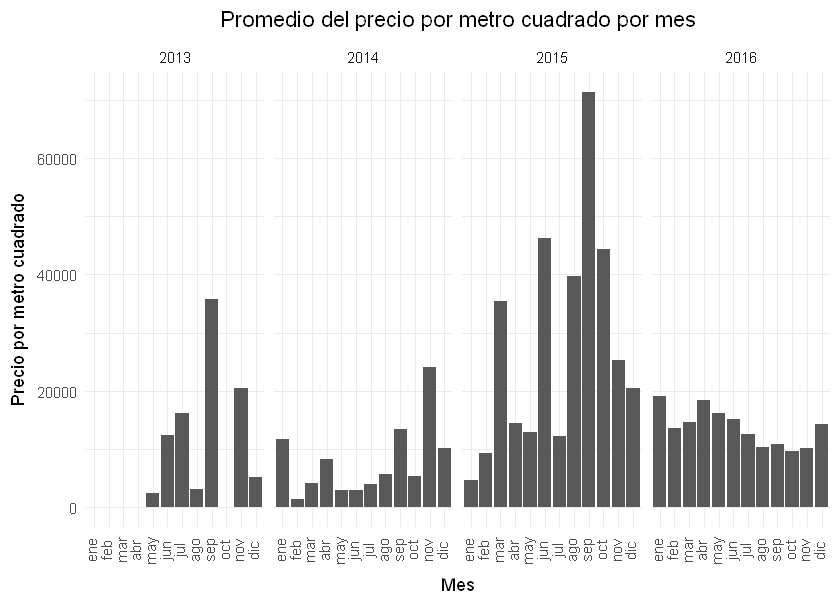

In [23]:
#Precio en moneda local por mes
aux <- aggregate(price_aprox_local_currency ~ created_month + created_year, data = df, median, na.rm = TRUE)
ggplot(data = aux, aes(x = created_month, y = price_aprox_local_currency)) + geom_bar(stat='identity') +
  facet_wrap(~created_year, nrow = 1) +
  labs(x = 'Mes', y = 'Precio por metro cuadrado') +
  ggtitle('Promedio del precio por metro cuadrado por mes') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.2), plot.title = element_text(hjust = 0.5))

In [24]:

result <- as.data.frame(table(df$place_name, df$created_year, df$created_month))
names(result) <- c('place_name', 'created_year', 'created_month', 'freq')


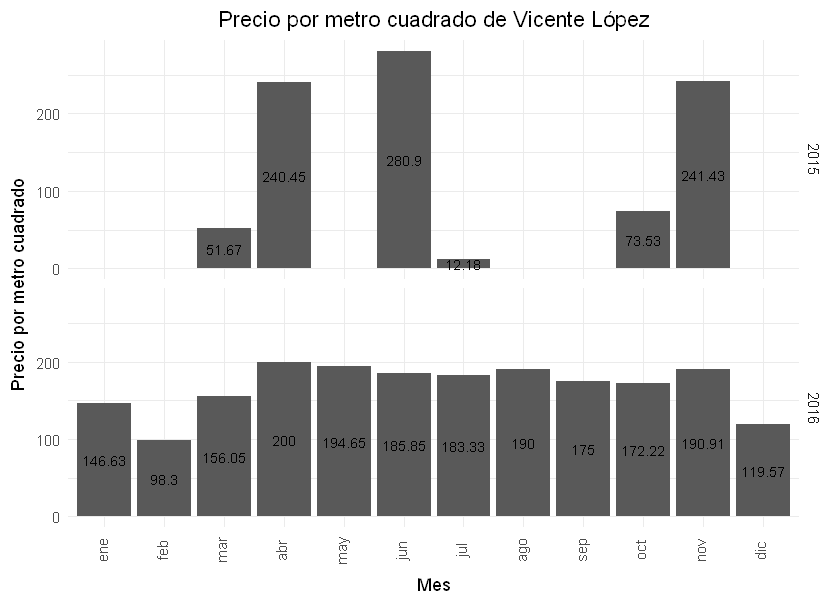

In [25]:
#Promedio precio por metro cuadrado por mes y año por lugar
aux <- aggregate(price_per_m2 ~ place_name + created_month + created_year, data = df, median, na.rm = TRUE)

plot_by_place_name <- function(x) {
  
  df.place <- subset(aux, place_name == x)
  
  ggplot(data = df.place, aes(x = created_month, y = price_per_m2, label = round(price_per_m2,2))) + geom_bar(stat='identity') +
  facet_grid(created_year~.) +
  geom_text(size = 3, position = position_stack(vjust = 0.5)) +
  labs(x = 'Mes', y = 'Precio por metro cuadrado') +
  ggtitle(paste('Precio por metro cuadrado de ', x, sep = "")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.2), plot.title = element_text(hjust = 0.5))
}

#Con esta funcion podemos ver el comportamiento del precio por metro cuadrado
#por ubicaciones independientes. Por ej.
plot_by_place_name('Vicente López')

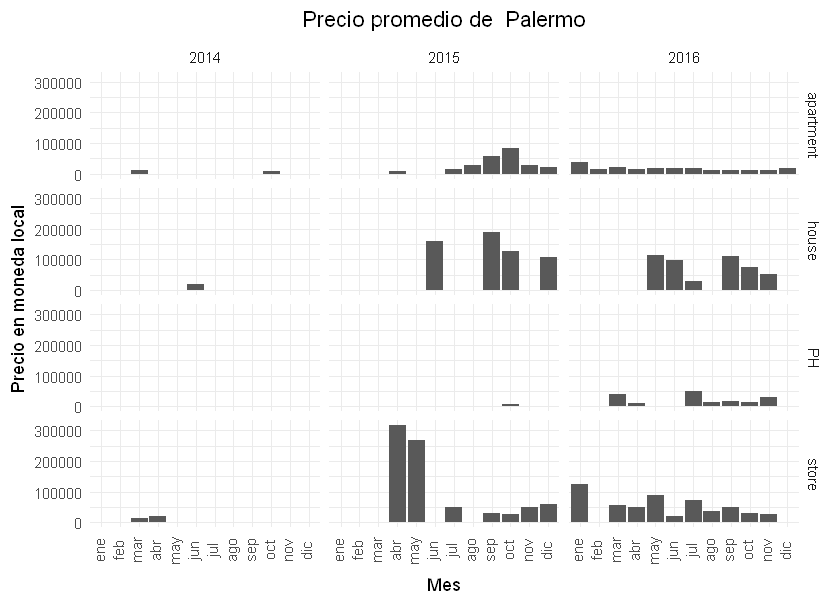

In [26]:
#Precio de renta del inmueble por mes y año
aux <- aggregate(price_aprox_local_currency ~ place_name + created_month + created_year + property_type, 
                 data = df, median, na.rm = TRUE)

plot_by_place_name <- function(x) {
  
  df.place <- subset(aux, place_name == x)
  
  ggplot(data = df.place, aes(x = created_month, y = price_aprox_local_currency)) + 
    geom_bar(stat='identity') +
    facet_grid(property_type~created_year) +
    labs(x = 'Mes', y = 'Precio en moneda local') +
    ggtitle(paste('Precio promedio de  ', x, sep = "")) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.2), plot.title = element_text(hjust = 0.5))
}

#Con esta funcion podemos ver el comportamiento del precio de renta
#por ubicaciones independientes. Por ej.
plot_by_place_name('Palermo')

In [27]:
#Numero de habitaciones según tipo de propiedad
aux <- subset(df, rooms < 8)  #Filtramos como màximo 8 habitaciones
rooms_by_proptype <- as.data.frame(table(aux$rooms, aux$property_type))
names(rooms_by_proptype) <- cols <- c('rooms', 'property_type', 'freq')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1    1000    1800    2966    3500   50000   20385 

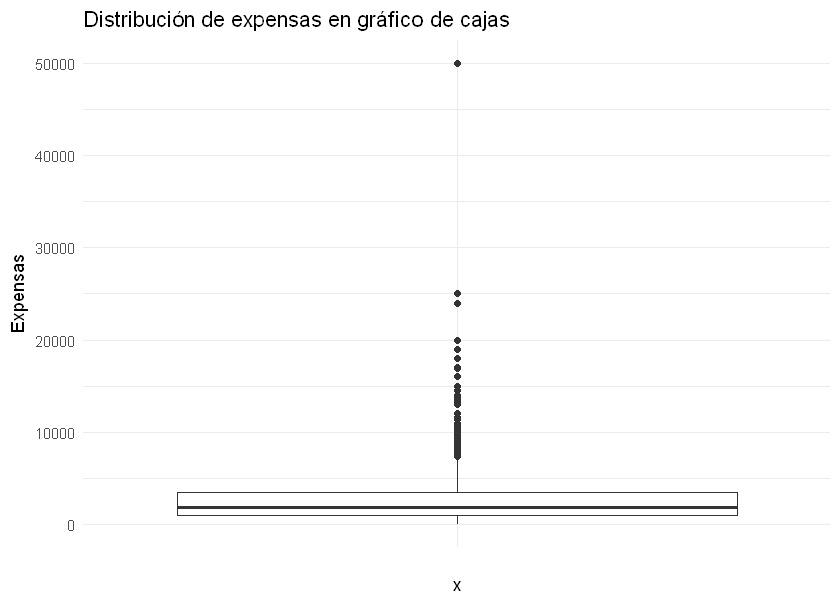

In [28]:
#Expensas
summary(df$expenses)
ggplot(data = df, aes(x = '', y = expenses)) + geom_boxplot() +
    labs(y = 'Expensas') + ggtitle('Distribución de expensas en gráfico de cajas') +
    theme_minimal()


 Variables sorted by number of missings: 
                   Variable     Count
                      floor 0.9246535
                   expenses 0.9142486
           price_usd_per_m2 0.5618245
                      rooms 0.5516437
        surface_total_in_m2 0.4565637
               price_per_m2 0.4086200
      surface_covered_in_m2 0.3238552
                        lat 0.2466251
                        lon 0.2466251
                      price 0.1535184
 price_aprox_local_currency 0.1535184
            price_aprox_usd 0.1535184
                geonames_id 0.1273714
                 created_on 0.0000000
              property_type 0.0000000
                 place_name 0.0000000
    place_with_parent_names 0.0000000
                   currency 0.0000000
              properati_url 0.0000000
                description 0.0000000
                      title 0.0000000
              created_month 0.0000000
               created_year 0.0000000
          created_yearmonth 0.0000000


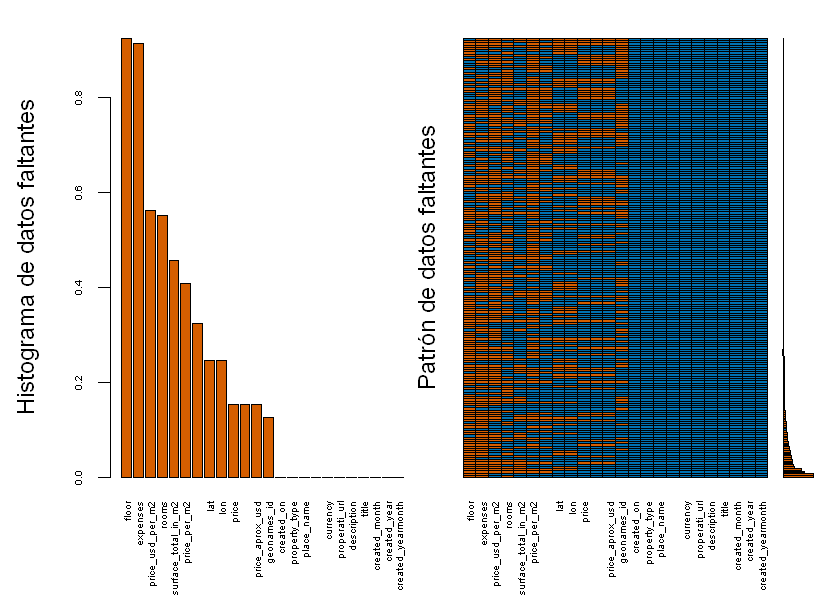

In [29]:
#Datos faltantes
aggr(df, digits=3, 
     numbers=TRUE, sortVars=TRUE,
     labels=names(df), cex.axis=.5, cex.numbers = .7,
     gap=2, ylabs=c("Histograma de datos faltantes","Patrón de datos faltantes"),
     col = c('#0072B2', '#D55E00'), prop = T)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=-34.672577,-59.152807&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


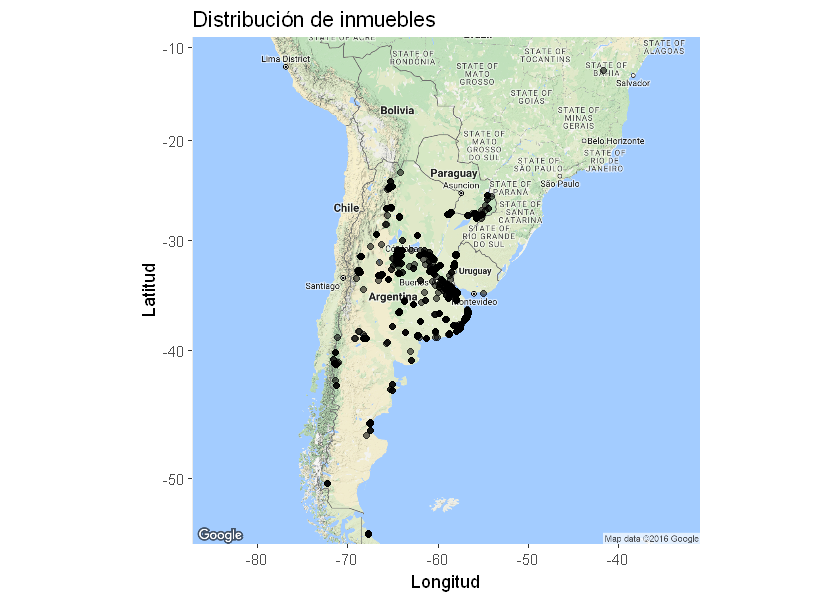

In [30]:
#Ubicación de inmuebles
tmp <- subset(df, !is.na(lat) & !is.na(lon))
lon_mn <- mean(tmp$lon, na.rm = TRUE)
lat_mn <- mean(tmp$lat, na.rm = TRUE)
argentina_map <- get_map(location = c(lon = lon_mn, lat = lat_mn), zoom = 4, maptype = "terrain", scale = 2)

ggmap(argentina_map) + geom_point(data = tmp, aes(x = lon, y = lat, alpha = 0.5)) +
    labs(x = "Longitud", y = "Latitud") + ggtitle("Distribución de inmuebles") +
    guides(alpha = FALSE)

In [31]:
#Ubicaciones de inmuebles con el paquete leaflet
tmp <- subset(df, !is.na(lat) & !is.na(lon))
lon_mn <- mean(tmp$lon, na.rm = TRUE)
lat_mn <- mean(tmp$lat, na.rm = TRUE)
plot1 <- leaflet(tmp) %>% addTiles() %>% setView(lon_mn, lat_mn, zoom = 4) %>% 
  addCircles(~lon, ~lat, popup=tmp$title, weight = 3, radius=40, color='#FF0000', stroke = TRUE, fillOpacity = 0.8) 

htmlwidgets::saveWidget(widget = plot1,file = "plot1.html", selfcontained = F)

link <- "<iframe width = 750p height = 500p src='plot1.html'></iframe>"
IRdisplay::display_html(link)

In [32]:
#Ubicaciones de inmuebles con el paquete leaflet

tmp <- subset(df, !is.na(lat) & !is.na(lon))
lon_mn <- mean(tmp$lon, na.rm = TRUE)
lat_mn <- mean(tmp$lat, na.rm = TRUE)

content <- paste("<b><a href='",tmp$properati_url,"'>", tmp$title,"</a></b><br>", tmp$place_name,"</br>")

plot2 <- leaflet(tmp) %>% addTiles() %>% setView(lon_mn, lat_mn, zoom = 4) %>% 
    addCircleMarkers(data = tmp, ~lon, ~lat, popup= content, radius = 6, opacity = 0.5,
                     clusterOptions = markerClusterOptions()) 

htmlwidgets::saveWidget(widget = plot2,file = "plot2.html", selfcontained = F)

link <- "<iframe width = 750p height = 500p src='plot2.html'></iframe>"
IRdisplay::display_html(link)